In [1]:
import os
import pandas as pd
import subprocess
import covid_daily
from covid_daily.constants import AVAILABLE_CHARTS, AVAILABLE_COUNTRIES 

In [6]:
AVAILABLE_CHARTS

['total-currently-infected-linear',
 'deaths-cured-outcome-small',
 'coronavirus-cases-linear',
 'graph-cases-daily',
 'graph-active-cases-total',
 'coronavirus-deaths-linear',
 'graph-deaths-daily',
 'cases-cured-daily',
 'deaths-cured-outcome']

In [5]:
import os
import pandas as pd
import subprocess
import covid_daily
from covid_daily.constants import AVAILABLE_CHARTS, AVAILABLE_COUNTRIES


def records_country(country_name, data_folder, add_dataset=False):
    """
    Get and records data from Worldometers.info
    Args: 
        country_name: (str) name of the country to records data,
        data_folder: (str) folder path to records data in,
        add_dataset: (bool) if True, trigger renku dataset add command
    """
    data = [covid_daily.data(country=country_name, chart=chart, as_json=False) for chart in AVAILABLE_CHARTS]
    data = pd.concat(data, axis=1)
    csv_path = os.path.join(data_folder,"{0:s}.csv".format(country_name))
    data.to_csv(csv_path)
    if add_dataset:
        cmd = "renku dataset add worldometers-data {0:s}".format(csv_path)
        subprocess.run(cmd, shell=True)
    return 

In [7]:
records_country("france", folder_name)

In [ ]:
folder_name = "/work/test-first-project/data/worldometers-data"
for country in AVAILABLE_COUNTRIES:
    records_country(country, folder_name)

In [23]:
os.mkdir("/work/test-first-project/data/worldometers-data")

In [ ]:
renku dataset add flight-data data/flight-data/2019-01-flights.csv.zip

In [20]:

data.head()

,Currently Infected,Percent (%),Total Coronavirus Cases,Novel Coronavirus Daily Cases,Total Coronavirus Currently Infected,Total Coronavirus Deaths,Novel Coronavirus Daily Deaths,New Daily Coronavirus Cases+Cured,Percent (%)
Date,,,,,,,,,
2020-02-15,7,20.00,12,NaN,7,1,NaN,NaN,20.00
2020-02-16,7,20.00,12,0.0,7,1,0.0,0.0,20.00
2020-02-17,6,16.67,12,0.0,6,1,0.0,1.0,16.67
2020-02-18,4,12.50,12,0.0,4,1,0.0,2.0,12.50
2020-02-19,4,12.50,12,0.0,4,1,0.0,0.0,12.50


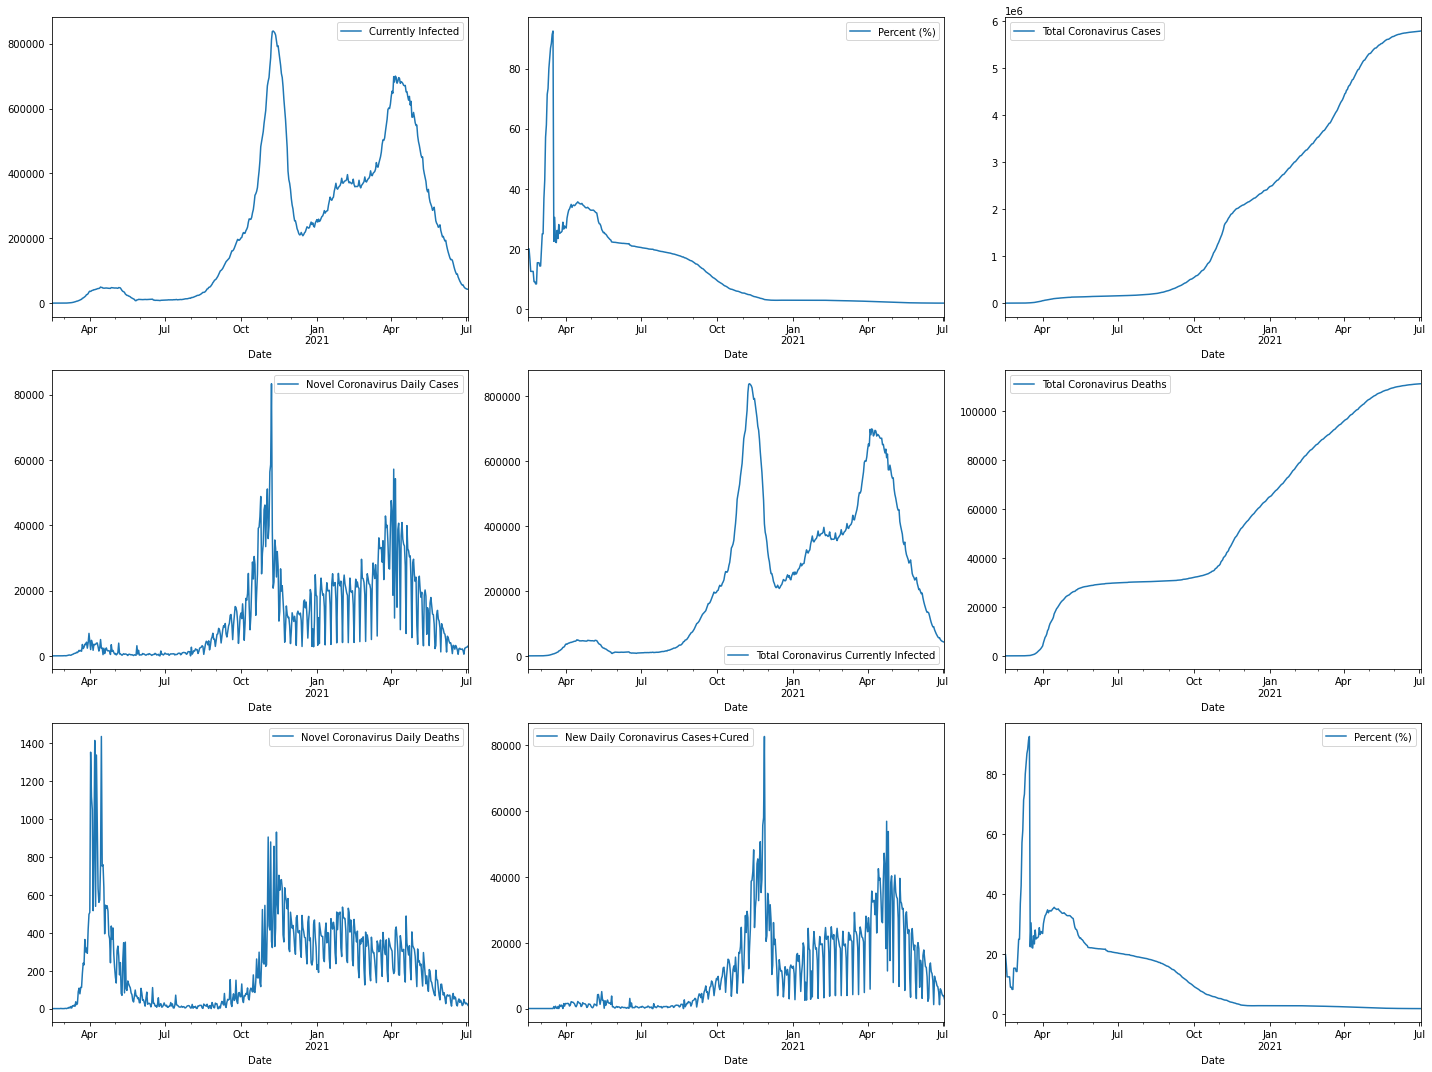

In [10]:
import covid_daily
import matplotlib.pyplot as plt


fig, axs = plt.subplots(3, 3, figsize=(20,15))

from itertools import product

pairs = list(product((range(3)), (range(3))))
datas = []
for idx, available_chart in enumerate(AVAILABLE_CHARTS):
    data = covid_daily.data(country='france', chart=available_chart, as_json=False)
    data.plot(ax=axs[pairs[idx]])
    datas.append(data)
fig.tight_layout()
fig.show()

In [9]:
AVAILABLE_CHARTS

['total-currently-infected-linear',
 'deaths-cured-outcome-small',
 'coronavirus-cases-linear',
 'graph-cases-daily',
 'graph-active-cases-total',
 'coronavirus-deaths-linear',
 'graph-deaths-daily',
 'cases-cured-daily',
 'deaths-cured-outcome']

In [7]:
datas[0]

,Currently Infected
Date,
2020-02-15,7
2020-02-16,7
2020-02-17,6
2020-02-18,4
2020-02-19,4
...,...
2021-06-29,47319
2021-06-30,45309
2021-07-01,44098
